In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
data_dir = Path('./experiments')
experiment_duration_seconds = 30
tick_rate = 120

sns.set_style('whitegrid')
# sns.set_context('paper')
sns.set_theme('notebook', style='whitegrid', palette='Set2', font_scale=1)

Experiment: CLEAVE-eu-north-1


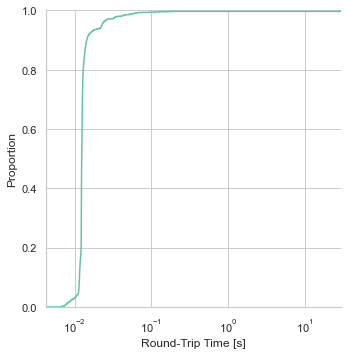

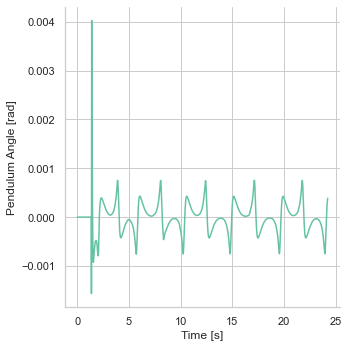

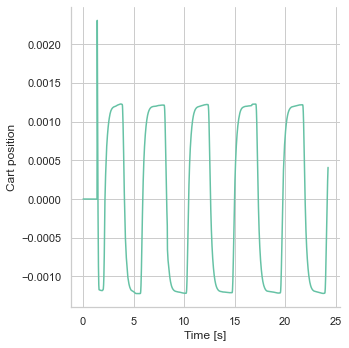

Experiment: test


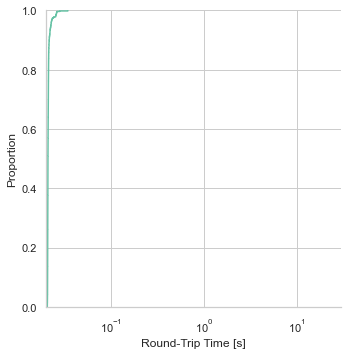

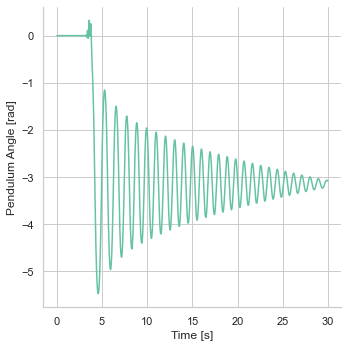

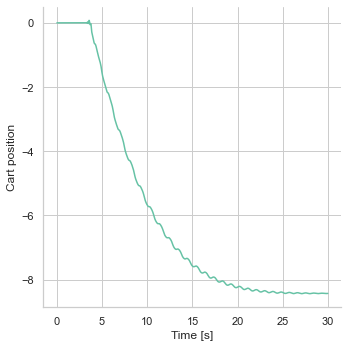

Experiment: CLEAVE-us-east-1


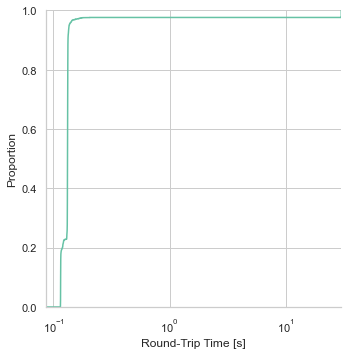

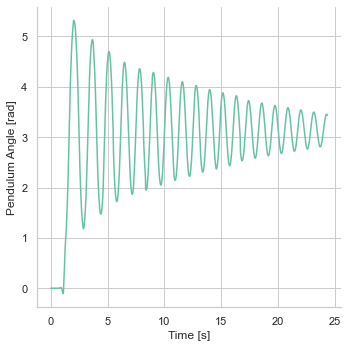

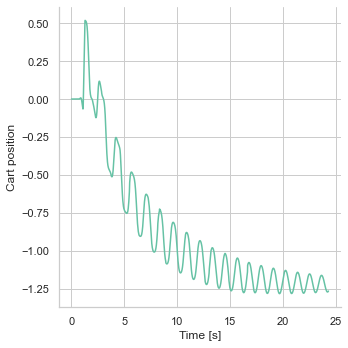

In [19]:
# process and plot
for p in data_dir.iterdir():
    if p.is_dir():
        experiment_name = p.name
        print(f'=============================')
        print(f'Experiment: {experiment_name}')
        print(f'=============================')

        net_data = pd.read_csv(next(p.glob('udpclient.*.csv')))

        # plot the rtt distribution
        # first, we need to fix the rtts a bit
        # dropped packets are marked as having RTT = inf
        # this doesn't work when plotting distributions,
        # so we are going to use a little trick and mark
        # infinites as equal to the total duration of the
        # experiment, in seconds

        net_data_fixed = net_data.copy()
        net_data_fixed['rtt'] = net_data['rtt'].replace(np.inf, experiment_duration_seconds)

        fg = sns.displot(
            kind='ecdf',
            data=net_data_fixed,
            x='rtt',
        )
        fg.set_xlabels('Round-Trip Time [s]')
        fg.set(xscale='log', xlim=(None, experiment_duration_seconds))

        plt.show()

        # next, analyze stability of the system
        # load plant physical data

        plant_data = pd.read_csv(next(p.glob('simulation.*.csv')))

        # <emulation_rate> samples equals a second
        plant_data['time'] = plant_data['tick'] / tick_rate

        fg = sns.relplot(
            kind='line',
            data=plant_data,
            x='time',
            y='output_angle'
        )
        fg.set_xlabels('Time [s]')
        fg.set_ylabels('Pendulum Angle [rad]')
        plt.show()

        fg = sns.relplot(
            kind='line',
            data=plant_data,
            x='time',
            y='output_position'
        )
        fg.set_xlabels('Time [s]')
        fg.set_ylabels('Cart position')
        plt.show()
